In [3]:
import os
import sys

sys.path.append(os.path.abspath('..'))

import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
import pandas as pd
from lib.Net import *
from lib.Func import *

In [4]:
def sin_sort(x, y, y_hat):
    idx = np.argsort(x, axis=0)
    return x[idx].reshape(-1), y[idx].reshape(-1), y_hat[idx].reshape(-1)

In [5]:
architecture_1 = [
    {"module": Mlp, "params": {"input_dim": 1, "output_dim": 8, "activation": "sigmoid"}},
    {"module": Mlp, "params": {"input_dim": 8, "output_dim": 4, "activation": "sigmoid"}},
    {"module": Mlp, "params": {"input_dim": 4, "output_dim": 1, "activation": "id"}},
]

In [6]:
modelpath_1 = "model/task1/sin.json"

In [7]:
net = Net(architecture_1)

100%|██████████| 4000/4000 [00:27<00:00, 143.34it/s, avg_loss=0.0319, loss=0.00133]


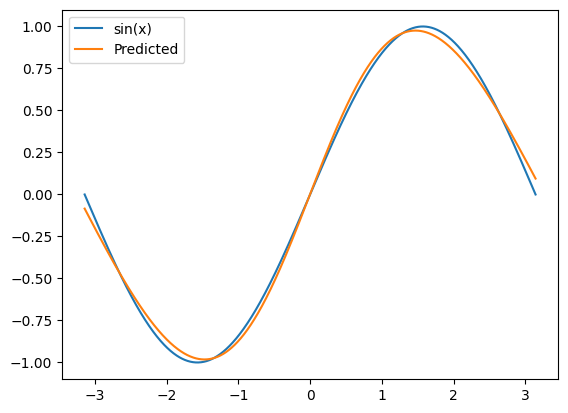

In [8]:
x = np.linspace(-np.pi, np.pi, 1000).reshape(-1, 1)
y = np.sin(x)

epochs = 4000
pbar = tqdm(range(epochs))

for i in pbar:
    x,y = shuffle(x, y)
    net.train(x, y, batch_size=10, lr=0.05, lossfunc="square")

    y_hat = net.predict(x)
    loss = net.loss(y, y_hat)
    avg_loss = np.mean(np.abs(y - y_hat))
    pbar.set_postfix(loss=loss, avg_loss=avg_loss)


x, y, y_hat = sin_sort(x, y, y_hat)
plt.plot(x, y, label="sin(x)")
plt.plot(x, y_hat, label="Predicted")
plt.legend()
plt.show()

In [9]:
net.save_params(modelpath_1)

Model parameters saved to model/task1/sin.json


In [10]:
net.load_params(modelpath_1)

Model parameters loaded from model/task1/sin.json
